In [1]:
import opendatasets as od
import os

In [2]:
od.download("https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset/data")

Skipping, found downloaded files in "./5-flower-types-classification-dataset" (use force=True to force download)


In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-10-28 06:34:13.750477: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-28 06:34:16.153353: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-28 06:34:16.161824: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-28 06:34:38.762026: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# Define data directory
data_dir = "5-flower-types-classification-dataset/flower_images"

In [5]:
# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

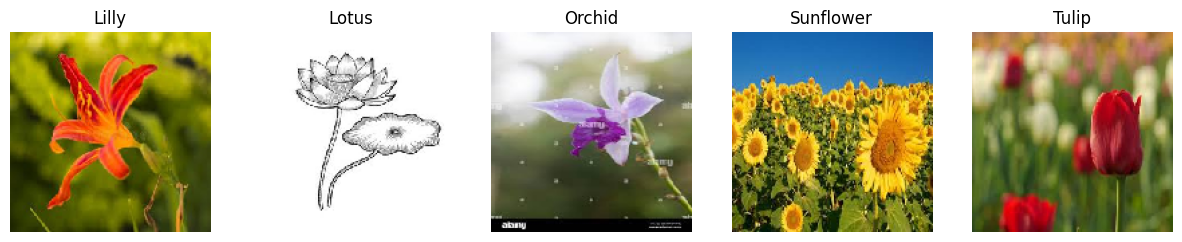

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define a dictionary for mapping class indices to class names
class_labels = {0: 'Lilly', 1: 'Lotus', 2: 'Orchid', 3: 'Sunflower', 4: 'Tulip'}

# Get one image from each class for visualization
sample_images = []
for class_index, class_label in class_labels.items():
    class_dir = os.path.join(data_dir, class_label)
    img_file = os.path.join(class_dir, os.listdir(class_dir)[0])  # Get the first image in the class folder
    img = image.load_img(img_file, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    sample_images.append((img_array, class_label))

# Display sample images
plt.figure(figsize=(15, 5))
for i, (img_array, class_label) in enumerate(sample_images):
    plt.subplot(1, 5, i+1)
    plt.imshow(img_array[0])
    plt.title(class_label)
    plt.axis('off')

plt.show()

In [ ]:
# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split data into 80% training and 20% validation
)

In [ ]:
categories = os.listdir(data_dir)
print(categories)

In [ ]:

# Load and preprocess training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify training data
)

In [ ]:
# Load and preprocess validation data
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify validation data
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt

In [ ]:
# Build ResNet model
resnet_model = ResNet50(weights='imagenet', include_top=False)
x = resnet_model.output
x = GlobalAveragePooling2D()(x)
predictions_resnet = Dense(5, activation='softmax')(x)
resnet_model_final = Model(inputs=resnet_model.input, outputs=predictions_resnet)


In [ ]:
# Build VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False)
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
predictions_vgg16 = Dense(5, activation='softmax')(x)
vgg16_model_final = Model(inputs=vgg16_model.input, outputs=predictions_vgg16)


In [ ]:
# Compile models
resnet_model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train models
epochs = 10
resnet_history = resnet_model_final.fit(train_generator, epochs=epochs, validation_data=validation_generator)
vgg16_history = vgg16_model_final.fit(train_generator, epochs=epochs, validation_data=validation_generator)


In [ ]:
# Compare testing accuracy
resnet_test_accuracy = resnet_model_final.evaluate(validation_generator, verbose=0)[1]
vgg16_test_accuracy = vgg16_model_final.evaluate(validation_generator, verbose=0)[1]

In [ ]:
# Create a bar graph
models = ['ResNet', 'VGG16']
accuracies = [resnet_test_accuracy, vgg16_test_accuracy]

plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylabel('Testing Accuracy')
plt.title('Comparison of Testing Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy percentage
plt.show()